In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
#%matplotlib notebook

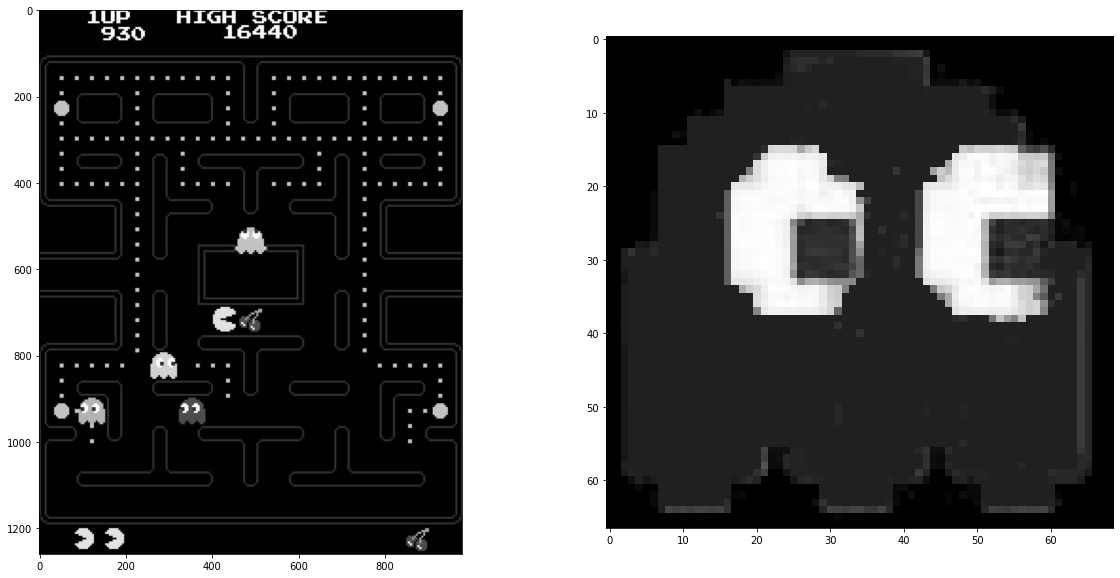

In [29]:
pattern = cv2.imread("../input/input.png",0)
im = cv2.imread("../input/pacman.png",0)
#pattern = cv2.cvtColor(pattern, cv2.COLOR_BGR2GRAY)
#im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.subplot(121),plt.imshow(im, cmap='gray')
plt.subplot(122),plt.imshow(pattern, cmap='gray')
plt.show()

In [3]:
sad = np.empty_like(im)
sad = sad.astype(float)
sad[:] = 0
for y in range(im.shape[0]-pattern.shape[0]):
    for x in range(im.shape[1]-pattern.shape[1]):
        ac_sad = np.absolute(im[y:y+pattern.shape[0],x:x+pattern.shape[1]] - pattern)
        sad[y,x] = ac_sad.sum()
        

In [4]:
sad = sad[0:sad.shape[0]-pattern.shape[0],0:sad.shape[1]-pattern.shape[1]]
sad = sad/sad.max()

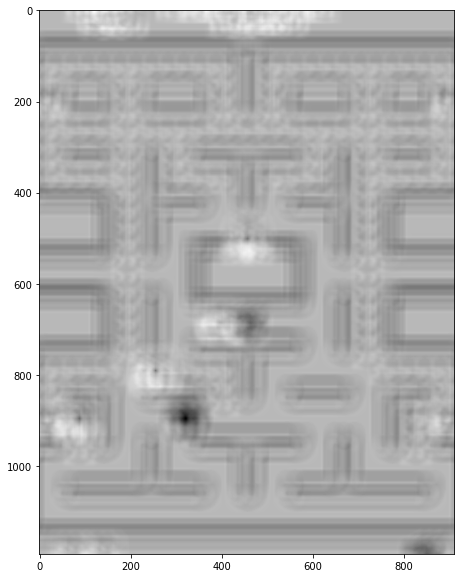

In [5]:
plt.imshow(sad, cmap='gray')
plt.show()

In [42]:
ssd = np.empty_like(im)
ssd = ssd.astype(float)
ssd[:] = 0
for y in range(im.shape[0]-pattern.shape[0]):
    for x in range(im.shape[1]-pattern.shape[1]):
        ac_ssd = np.square(np.absolute(im[y:y+pattern.shape[0],x:x+pattern.shape[1]] - pattern))
        ssd[y,x] = ac_ssd.sum()

In [43]:
ssd = ssd[0:ssd.shape[0]-pattern.shape[0],0:ssd.shape[1]-pattern.shape[1]]

In [44]:
ssd = ssd/ssd.max()
ssd.mean()

0.44132546651377563

In [45]:
locssd = np.where(ssd <=0.3)
locssd

(array([   0,    0,    0, ..., 1192, 1192, 1192], dtype=int64),
 array([  0,   1,   2, ..., 908, 909, 910], dtype=int64))

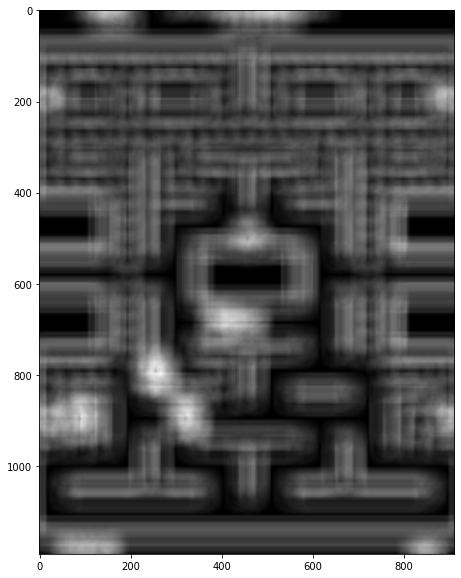

In [46]:
plt.imshow(ssd, cmap='gray')
plt.show()

In [9]:
cc = np.empty_like(im)
cc = cc.astype(float)
cc[:] = 0
for y in range(im.shape[0]-pattern.shape[0]):
    for x in range(im.shape[1]-pattern.shape[1]):
        ac_cc = np.multiply(im[y:y+pattern.shape[0],x:x+pattern.shape[1]], pattern)
        cc[y,x] = ac_cc.sum()

In [10]:
cc = cc[0:cc.shape[0]-pattern.shape[0],0:cc.shape[1]-pattern.shape[1]]

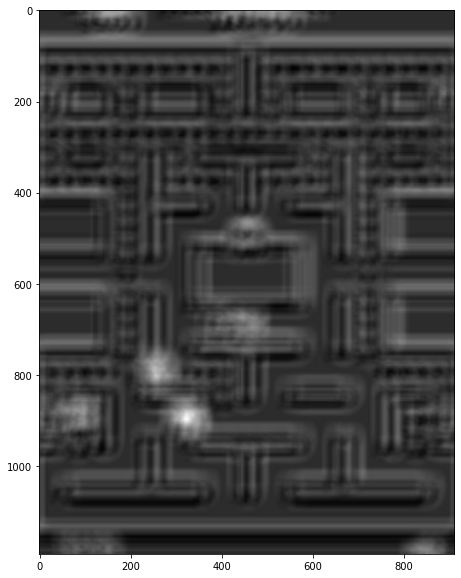

In [11]:
plt.imshow(cc, cmap='gray')
plt.show()

In [19]:
mscc = np.empty_like(im)
mscc = mscc.astype(float)
mscc[:] = 0
pattern = pattern - pattern.mean()
for y in range(im.shape[0]-pattern.shape[0]):
    for x in range(im.shape[1]-pattern.shape[1]):
        current_region = im[y:y+pattern.shape[0],x:x+pattern.shape[1]]
        shift_region = np.absolute(current_region - current_region.mean())
        ac_mscc = np.multiply(shift_region, pattern)
        mscc[y,x] = ac_mscc.sum()

In [24]:
mscc = mscc[0:(mscc.shape[0]-pattern.shape[0]),0:(mscc.shape[1]-pattern.shape[1])]

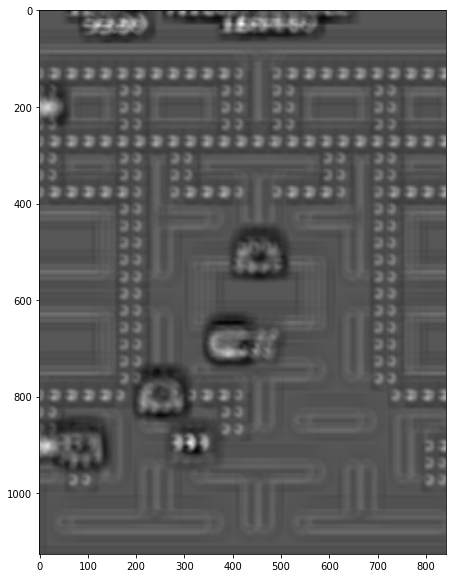

In [25]:
plt.imshow(mscc, cmap='gray')
plt.show()

In [27]:
mscc

array([[      0.        ,       0.        ,       0.        , ...,
              0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        , ...,
              0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        , ...,
              0.        ,       0.        ,       0.        ],
       ...,
       [-616977.86200729, -642597.33306752, -630203.07529517, ...,
        -533246.10113611, -533246.10113611, -533246.10113611],
       [-634546.11253273, -659798.51906916, -649570.79695401, ...,
        -591129.49209178, -591129.49209178, -591129.49209178],
       [-619178.77129064, -644361.18131385, -633420.87646991, ...,
        -593935.39763867, -593935.39763867, -593935.39763867]])

In [31]:
pattern.mean()

50.766169154228855